# Giris
Yeni bir TensorFlow 2 çalışma bölümünden merhaba arkadaşlar. Bu bölümde CSV(Comma-Separated Values) verileri üzerinde çalışacağız ve bu verileri model için uygun hale getireceğiz. CSV(Comma-Separated Values) verileri, oldukça yaygın bir veri biçimidir; birçok veri sitelerinde kaggle gibi CSV formatında verilerle karşılaşabilirsiniz.<br>
Nedir CSV(Comma-Separated Values)?<br>
CSV (Comma-Separated Values) veri setleri, verilerin düzenli bir biçimde saklanması ve taşınması için kullanılan, düz metin formatında bir dosya türüdür. Genellikle satır ve sütunlardan oluşan bir tabloyu temsil eder ve veri biliminde, makine öğreniminde, veri analizinde ve veri aktarımında yaygın olarak kullanılır.

In [1]:
# Kullanacagimiz kutuphaneleri ice aktariyoruz
import pandas as pd
import numpy as np

# Numpy değerlerini daha kolay okunabilir hale getirin.
np.set_printoptions(precision = 3, suppress = True)

import tensorflow as tf
from tensorflow.keras import layers

# Bellekteki veriler
Herhangi bir küçük CSV veri kümesi için TensorFlow modelini eğitmenin en basit yolu, onu belleğe pandas DataFrame veya NumPy dizisi olarak yüklemektir.

In [2]:
# CSV formatindaki veriyi Pandas kutuphanesini kullanarak egitecegiz
abalone_train = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


abalone_train veri seti, genellikle makine öğrenimi ve istatistiksel modelleme örneklerinde kullanılan bir veri kümesidir. Bu veri seti, deniz kulağı (abalone) adı verilen deniz canlılarının yaşam özellikleriyle ilgilidir. Amaç, deniz kulağının bazı fiziksel özelliklerini kullanarak yaşını tahmin etmektir.<br>
Öznitelikler (Features):<br>
Veri setinde genellikle şu öznitelikler bulunur:

1. Length (Uzunluk): Deniz kulağının en uzun boyutu (milimetre cinsinden).
2. Diameter (Çap): Uzunluğa dik şekilde ölçülen çap (milimetre cinsinden).
3. Height (Yükseklik): Deniz kulağının kabuğunun yüksekliği (milimetre cinsinden).Kabukla birlikte ölçülür.
4. Whole Weight (Tam Ağırlık): Deniz kulağının tüm ağırlığı (gram cinsinden).
5. Shucked Weight (Kabuksuz Ağırlık): Deniz kulağının kabuğu çıkarılmış durumdaki ağırlığı (gram cinsinden).
6. Viscera Weight (Organ Ağırlığı): İç organların ağırlığı (gram cinsinden).
7. Shell Weight (Kabuk Ağırlığı): Kabuk kuruduktan sonraki ağırlığı (gram cinsinden).

Bu veri setini kullanarak yaş (Age) tahmini yapmaya çalışacağız. Bu nedenle, yaş (Age) sütununu veri kümesinden ayırıyoruz.

In [3]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [4]:
abalone_features.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300


In [5]:
abalone_labels.head()

,Age
0,7
1,6
2,14
3,16
4,13


Veri setimizi eğitime verebilmek için numpy array formatına dönüştürmemiz gerekiyor.<br>
Neden numpy array formatina ceviriyoruz?<br>
-  Hız ve Verimlilik
- Model Uyumluluğu(Çoğu makine öğrenimi ve derin öğrenme kütüphanesi (ör. TensorFlow, PyTorch, Scikit-learn) NumPy array formatını doğal olarak destekler.)
- Matematiksel İşlemlerin Kolaylığı
- Veri Manipülasyonu ve Ölçeklendirme
- Veri Boyutlandırma ve Özellik Ayarı

In [6]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [7]:
# Kucuk bir model olusuturuyoruz
abalone_model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [8]:
# Egitim
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 104.2154
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.6960
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11.8231
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.4730
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1225
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5881
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2363
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6557
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4710
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6195


# Temel ön işlem

In [9]:
normalize = layers.Normalization()

tf.keras.layers.Normalization katmanı her sütunun ortalamasını ve varyansını önceden hesaplar ve bunları verileri normalleştirmek için kullanır.

In [10]:
# Hazirladigimiz normalizasyon fonksiyonunu veri setine uyguluyoruz.
normalize.adapt(abalone_features)

In [11]:
# Normalizasyon fonksiyonu ile yeni model olusuturuyoruz ve egitimi yapiyoruz
# Model
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])
norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())
# Egitim
norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 95.4334
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.4210
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29.2769
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.6727
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9466
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3158
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1964
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4007
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0559
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9678


# Karma veri türleri
Önceki veri kümemizdeki her bir kolon, float veri türünde idi. Şimdi ise yeni veri seti üzerinde çalışarak farklı veri türlerini göreceğiz. Farklı veri türleri üzerinde işlemler gerçekleştireceğiz. Bu işlemler, veri kümesini eğitim için uygun hale getirecek.<br>
Calisacagimiz veri setinin ismi Titanic veri setidir.<br>


In [12]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


**Titanic Veri Setinin Özellikleri**<br>
Veri seti, Titanic'te seyahat eden yolcuların özelliklerini ve bu yolcuların hayatta kalma durumunu içerir. Hedef değişken, bir yolcunun hayatta kalıp kalmadığını belirten bir ikili (binary) değişkendir.

Veri Setindeki Sütunlar:
- Survived: Hayatta kalma durumu (Hedef değişken):
  - 0: Hayatta kalmadı.
  - 1: Hayatta kaldı.
- Sex: Cinsiyet (male veya female).
- Age: Yolcunun yaşı (eksik değerler olabilir).
- SibSp(n_siblings_spouses): Gemideki kardeş veya eş sayısı.
- Parch: Gemideki ebeveyn veya çocuk sayısı.
- Fare: Biletin ücreti (para birimi sterlin olarak ifade edilir).
- Pclass: Bilet sınıfı (sosyal-ekonomik statü):
  - 1: Birinci sınıf
  - 2: İkinci sınıf
  - 3: Üçüncü sınıf
- Cabin(deck): Kabin numarası (eksik değerler olabilir).
- Embarked(alone): Gemiye nereden bindiği:
  - C: Cherbourg
  - Q: Queenstown
  - S: Southampton

Bu veri setinde de yolcuların hayatta kalıp kalmadığını tespit etmek için "Survived" kolonunu diğer kolonlardan ayırıyoruz.

In [13]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [14]:
titanic_features.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [15]:
titanic_labels.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


Yukarıdaki bilgiler bizim için çok önemli, çünkü yapay zeka modeli 'object' veri türündeki verileri kabul etmemektedir. Bundan dolayı veri setine bir ön işleme yaparak 'object' verilerimizin türünü değiştireceğiz.

In [17]:
titanic.isnull().sum()

,0
survived,0
sex,0
age,0
n_siblings_spouses,0
parch,0
fare,0
class,0
deck,0
embark_town,0
alone,0


Aynı zamanda veri setinde boş değer bulunması da kötüdür. Eğer veri kümesinde boş değer olsaydı, onları silmek zorunda kalacaktık veya başka işlemler de uygulanabilirdi.

Sembolik, yani float veya integer olmayan veri türlerini Keras ile istediğimiz formata dönüştüreceğiz.

In [18]:
# Senbolik veri yarat
input = tf.keras.Input(shape=(), dtype = tf.float32)

# Girişi(input) kullanarak bir hesaplama gerçekleştirin
result = 2*input + 1

result

<KerasTensor shape=(None,), dtype=float32, sparse=False, name=keras_tensor_9>

In [19]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [20]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


In [21]:
# Ön işleme modelini oluşturmak için, CSV sütunlarının adlarını ve veri türlerini eşleştiren bir dizi sembolik tf.keras.Input nesnesi oluşturarak başlayın.
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=sex>,
 'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fare>,
 'class': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=class>,
 'deck': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=deck>,
 'embark_town': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=embark_town>,
 'alone': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=alone>}

In [22]:
# Sayisal degerlerin normalizasyon islemi
numeric_inputs = {name:input for name, input in inputs.items() if input.dtype == tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_11>

In [23]:
preprocessed_inputs = [all_numeric_inputs]

In [24]:
preprocessed_inputs

[<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_11>]

In [25]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary = np.unique(titanic_features[name])) #  katmanı, kategorik (metinsel) verilerdeki her bir benzersiz değeri bir tam sayı indeksine dönüştürür.
  one_hot = layers.CategoryEncoding(num_tokens = lookup.vocabulary_size()) # katmanı, tam sayı indekslerini bir one-hot kodlama vektörüne dönüştürür.

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

One-hot kodlama, kategorik verileri bir vektör biçiminde ifade etme yöntemidir. Her kategorik değer, yalnızca bir pozisyonun 1 olduğu, geri kalan pozisyonların 0 olduğu bir ikili vektör ile temsil edilir.

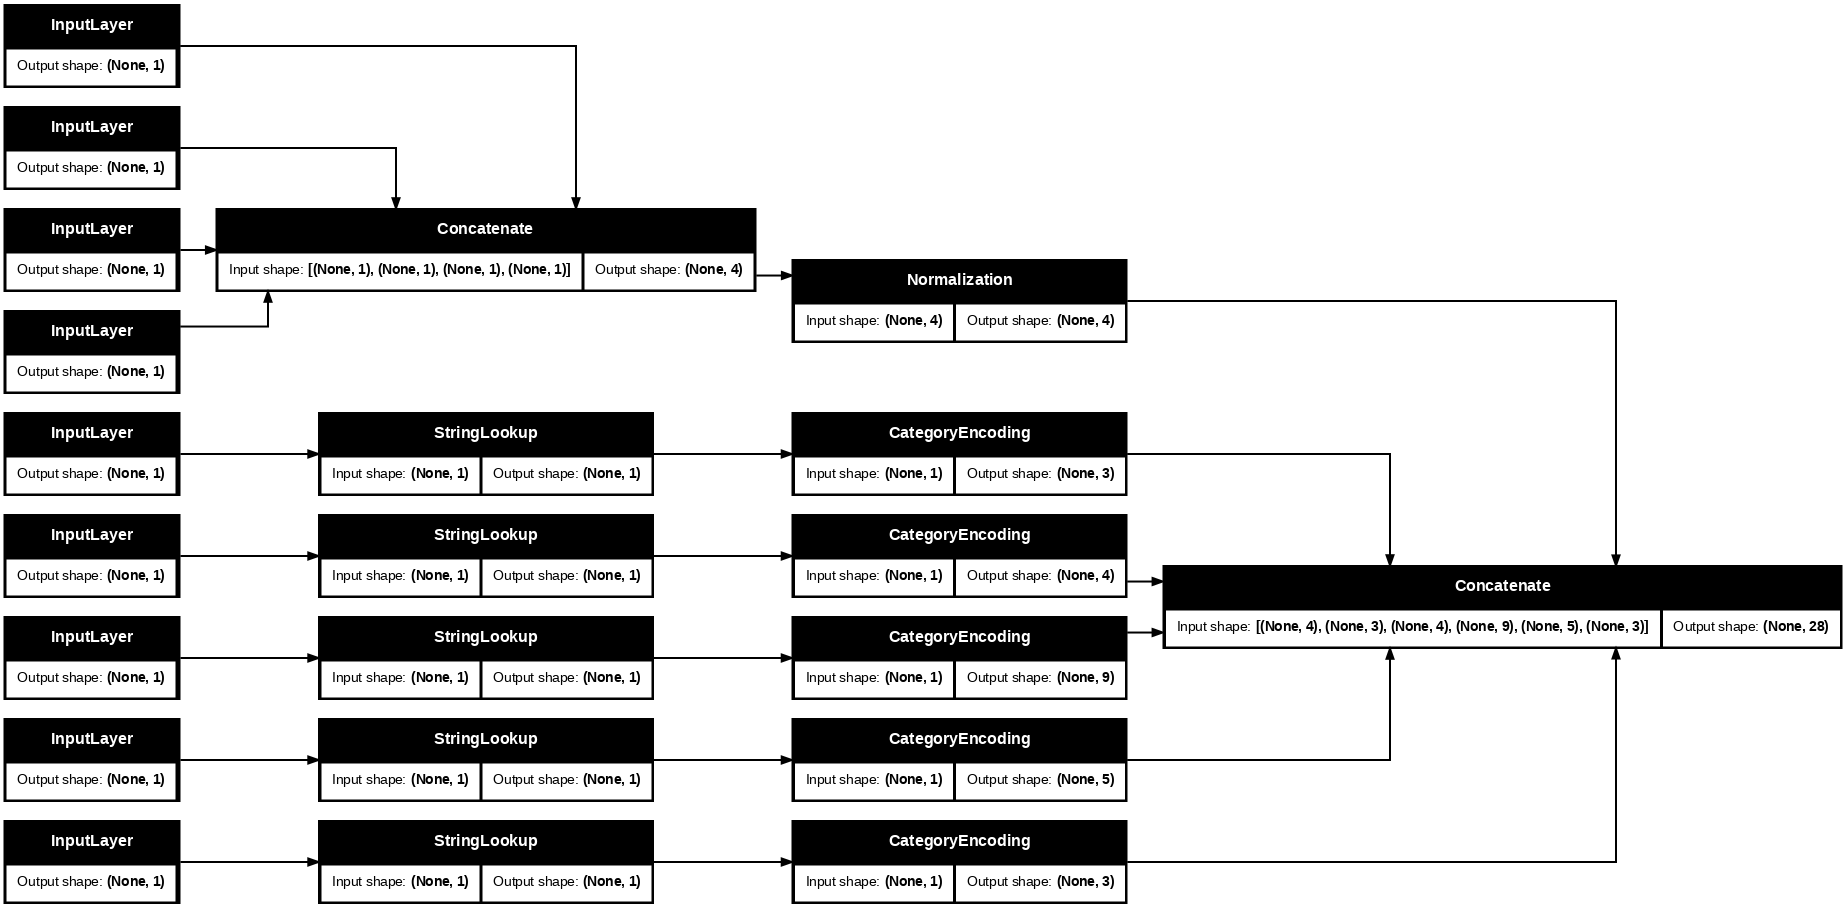

In [26]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing, rankdir = 'LR', dpi = 72, show_shapes = True)

Oluşturduğumuz bu model, yalnızca veri içerisinde ön işlem uygulamak için hazırlanmıştır.

In [27]:
titanic_features_dict = {name: np.array(value) for name, value in titanic_features.items()}

In [28]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

Arkadaslar aslinda yukaridaki gormus oldugunuz deger veri setimizin bir satirini gostermektedir.<br>

| sex  | age  | n_siblings_spouses | parch | fare  | class | deck    | embark_town | alone |
|------|------|---------------------|-------|-------|-------|---------|-------------|-------|
| male | 22.0 | 1                   | 0     | 7.25  | Third | unknown | Southampton | n     |

Yukarıdaki tabloda işlenmemiş halini,
aşağıdaki tabloda işlenmiş halinin bir örneği bulunmaktadır.

| age  | n_siblings_spouses | parch | fare  | sex_male | class_Third | deck_unknown | embark_town_Southampton | alone_n |
|------|---------------------|-------|-------|----------|-------------|--------------|--------------------------|---------|
| 22.0 | 1                   | 0     | 7.25  | 1        | 1           | 1            | 1                        | 1       |

Arkadaşlar, burada bir kolonu örnek alacak olursak, class kısmının üç sınıfı bulunmaktadır. Bunlar first, second ve third şeklinde one-hot kod uygulanmış halindedir. Bu durumda, kolon isimleri class_first, class_second ve class_third şeklinde olacak ve o satırın verisi eğer first class ise, class_first veri 1 ile tanımlanacak şekilde olacaktır.


In [29]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                optimizer = tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [30]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6879
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6126
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5485 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4962 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4761 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4628 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4493 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4262 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4126  
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4164 


In [31]:
titanic_model.save('test.keras')
reloaded = tf.keras.models.load_model('test.keras')

In [32]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.937]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.937]], shape=(1, 1), dtype=float32)


# tf.data
Bu bölümde 'tf.data' fonksiyonundan yararlanarak veri seti üzerinde işlemler gerçekleştireceğiz.

Not : Giriş veri hattı üzerinde daha fazla kontrole ihtiyacınız varsa veya belleğe kolayca sığmayan verileri kullanmanız gerekiyorsa: tf.data'yı kullanın.

## Bellekteki verilerde

In [35]:
import itertools

def slices(features):
  for i in itertools.count():
    example = {name:values[i] for name, values in features.items()}
    yield example

Yukarıdaki kod, bir özellikler (features) sözlüğünü alarak, içindeki her özelliği ayrı bir örneğe (example) dönüştüren bir Python generator'ıdır.

In [36]:
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f'{name:19s}: {value}')
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [49]:
features_ds  = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

Aşağıdaki kod, TensorFlow'un tf.data.Dataset.from_tensor_slices işlevini kullanarak bir Dataset nesnesi oluşturur. Bu işlev, sözlükteki tensörleri dilimleyerek her bir örneği ayrı bir veri kümesi örneği olarak işler. Aslına bakarsanız, bizim hazırladığımız 'slices' fonksiyonunun TensorFlow versiyonudur.

In [50]:
for example in features_ds :
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [51]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [52]:
# Aşağıdaki kod, TensorFlow'un tf.data.Dataset.from_tensor_slices işlevini kullanarak bir Dataset nesnesi oluşturur. Bu işlev, sözlükteki tensörleri dilimleyerek her bir örneği ayrı bir veri kümesi örneği olarak işler.
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [53]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4044
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4218 
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3869 
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4206 
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4200 


## Tek bir dosyadan
Bu eğitim şimdiye kadar bellek içi verilerle çalıştı. tf.data, veri hatları oluşturmak için oldukça ölçeklenebilir bir araç takımıdır ve CSV dosyalarını yüklemek için birkaç işlev sağlar.

In [54]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

30874/30874 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [55]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, #  Örneklerin daha kolay gösterilebilmesi için yapay olarak küçük.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


Yukaridakiki kod, bir Titanic veri kümesi CSV dosyasını TensorFlow tf.data.experimental.make_csv_dataset fonksiyonu ile bir tf.data.Dataset nesnesine dönüştürüyor.

Bu fonksiyon birçok kullanışlı özellik içerir, bu nedenle verilerle çalışmak kolaydır. Bunlar şunları içerir:
- Sütun başlıklarını sözlük anahtarı olarak kullanmak.
- Her sütunun tipini otomatik olarak belirleme.

In [56]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'female' b'male' b'male' b'female' b'male']
age                 : [24. 46. 28. 60. 62.]
n_siblings_spouses  : [2 0 0 1 0]
parch               : [3 0 0 0 0]
fare                : [18.75  79.2    7.896 75.25  10.5  ]
class               : [b'Second' b'First' b'Third' b'First' b'Second']
deck                : [b'unknown' b'B' b'unknown' b'D' b'unknown']
embark_town         : [b'Southampton' b'Cherbourg' b'Southampton' b'Cherbourg' b'Southampton']
alone               : [b'n' b'y' b'y' b'n' b'y']

label               : [1 0 0 1 1]


Ayrıca verileri anında sıkıştırabilir. İşte metro eyaletler arası trafik veri setini içeren sıkıştırılmış bir CSV dosyası.

In [58]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz',
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic'
)

 237568/Unknown 0s 0us/step

In [61]:
# Sıkıştırılmış dosyanın doğrudan okunacak şekilde ayrıştırılması.
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size = 256,
    label_name = 'traffic_volume',
    num_epochs = 1,
    compression_type = 'GZIP'
)

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f'{key:20s}: {value[:5]}')
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [291.36 296.22 280.81 258.34 257.89]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [ 0  0 90  5 40]
weather_main        : [b'Clear' b'Clear' b'Clouds' b'Clear' b'Clouds']
weather_description : [b'Sky is Clear' b'Sky is Clear' b'overcast clouds' b'sky is clear'
 b'scattered clouds']
date_time           : [b'2013-08-03 00:00:00' b'2013-07-05 10:00:00' b'2013-05-10 22:00:00'
 b'2013-02-04 11:00:00' b'2013-01-24 17:00:00']

label               : [1415 3716 2726 4195 5891]


## Önbelleğe alma
Kullanım durumunuza bağlı olarak, CSV verilerinin yalnızca ilk dönemde ayrıştırılması için Dataset.cache veya tf.data.Dataset.snapshot kullanmak iyi bir fikir olabilir.

Önbellek ve anlık görüntü yöntemleri arasındaki temel fark, önbellek dosyalarının yalnızca onları oluşturan TensorFlow işlemi tarafından kullanılabilmesi, ancak anlık görüntü dosyalarının diğer işlemler tarafından okunabilmesidir.

Örneğin, traffic_volume_csv_gz_ds üzerinde 20 kez yineleme yapmak, önbelleğe alma olmadan yaklaşık 15 saniye, önbelleğe alma ile yaklaşık iki saniye sürebilir.

Not : CSV verilerini ayrıştırmanın bazı ek yükleri vardır. Küçük modeller için bu, eğitimde darboğaz olabilir.

In [64]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
  print()

.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.







































.
















Not: Dataset.cache ilk dönemden gelen verileri depolar ve sırayla tekrar oynatır. Bu nedenle, önbellek yöntemini kullanmak, boru hattında daha önceki tüm karıştırmaları devre dışı bırakır. Aşağıda, Dataset.shuffle, Dataset.cache'den sonra tekrar eklenmiştir.

In [67]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 4.04 s, sys: 289 ms, total: 4.33 s
Wall time: 4.44 s


Önbelleğe aktarıldıktan sonraki verilerin döndürme hızı 41 saniyeden 4 saniyeye düştü.

In [70]:
%%time
snapshotting = traffic_volume_csv_gz_ds.snapshot('titanic.tfsnap').shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end = '')
print()

...............................................................................................
CPU times: user 4.79 s, sys: 426 ms, total: 5.22 s
Wall time: 4.11 s


Not: tf.data.Dataset.snapshot dosyaları, kullanım sırasında bir veri kümesinin geçici olarak depolanması içindir. Bu, uzun süreli depolama için bir biçim değildir. Dosya biçimi dahili bir ayrıntı olarak kabul edilir ve TensorFlow sürümleri arasında garanti edilmez.

## Birden fazla dosya
Bu bölümdeki şimdiye kadarki tüm örnekler tf.data olmadan kolayca yapılabilir. tf.data'nın işleri gerçekten basitleştirebileceği bir yer, dosya koleksiyonlarıyla uğraşmaktır.

In [71]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

158089216/Unknown 4s 0us/step

In [72]:
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts/AGENCY.csv',
 'fonts/ARIAL.csv',
 'fonts/BAITI.csv',
 'fonts/BANKGOTHIC.csv',
 'fonts/BASKERVILLE.csv',
 'fonts/BAUHAUS.csv',
 'fonts/BELL.csv',
 'fonts/BERLIN.csv',
 'fonts/BERNARD.csv',
 'fonts/BITSTREAMVERA.csv']

In [74]:
print('Toplam csv sayimiz: ',len(font_csvs))

Toplam csv sayimiz:  153


In [76]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = 'fonts/*.csv',
    batch_size = 10,
    num_epochs = 1,
    num_parallel_reads = 20,
    shuffle_buffer_size = 10000)

Yukaridaki kod, fonts/*.csv dosyalarını kullanarak bir CSV veri kümesi oluşturur ve bu veri kümesini bir tf.data.Dataset nesnesine dönüştürür.

Bu CSV dosyalarında resimler tek bir satıra düzleştirilmiştir. Sütun adları r{row}c{column} biçimindedir.

In [77]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'DUTCH801' b'KRISTEN' b'WIDE' b'BOOK' b'ROCKWELL' b'BOOK' b'WIDE'
 b'BOOK' b'NINA' b'NINA']
fontVariant         : [b'DUTCH801 XBD BT' b'KRISTEN ITC' b'WIDE LATIN' b'BOOK ANTIQUA'
 b'ROCKWELL EXTRA BOLD' b'BOOK ANTIQUA' b'WIDE LATIN' b'BOOK ANTIQUA'
 b'NINA' b'NINA']
m_label             : [ 183  208  192  373   40 8467 8230 7808 1168  295]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.7 0.4 0.4 0.4]
italic              : [1 1 0 0 0 0 0 0 0 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [56 45 22 40 37 37 72 23 25 36]
m_left              : [30 27 17 21 23 21 25 21 24 19]
originalH           : [12 45 63 44 60 48 13 62 62 51]
originalW           : [12 46 97 54 25 26 79 66 25 31]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [1 1 1 1 1 1 1 1 1 1]
r0c1                : [  1   1   1   1   1   1 123   1   1   1]
r0c2                : [  1   1   1   1   

### İsteğe bağlı: Paketleme alanları

In [82]:
import re

def make_images(features):
  image = [None]*400
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

Yukarikdaki kod, verilen features sözlüğündeki rXcY formatındaki özellikleri kullanarak 20x20'lik bir görüntü oluşturur ve bunu tensor formatına dönüştürerek geri döndürür. Diğer tüm özellikler ise, görüntü dışında tutulur ve yeni bir sözlükte saklanır.

In [81]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
  break

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 61509 (\uf045) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 61509 (\uf045) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


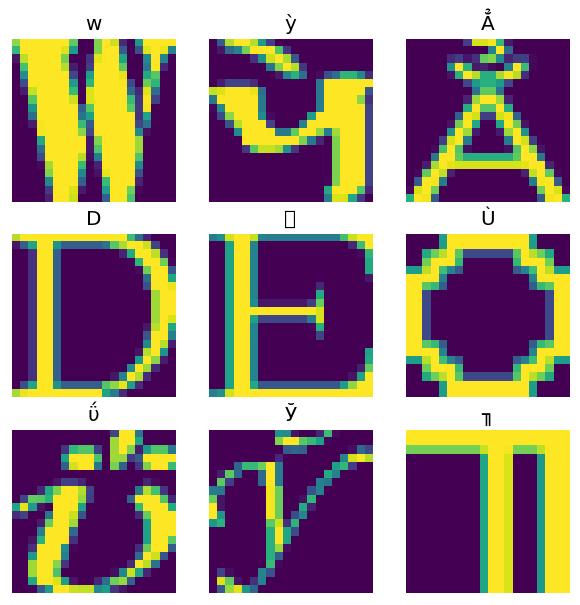

In [83]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][..., n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')

CSV formatında paketlenmiş verileri, piksel verilerinden yararlanarak 20x20 resim formatına yeniden oluşturduk.

# Alt düzey işlevler
Şimdiye kadar bu eğitim, csv verilerini okumak için en üst düzey yardımcı programlara odaklandı. Kullanım durumunuz temel kalıplara uymuyorsa ileri düzey kullanıcılar için yararlı olabilecek iki API daha var.<br>
- tf.io.decode_csv: Metin satırlarını CSV sütun tensörleri listesine ayrıştırmak için bir fonksiyon.
- tf.data.experimental.CsvDataset: daha düşük seviyeli bir CSV veri kümesi oluşturucusu.

Bu bölümde, yukarıdaki iki fonksiyona odaklanarak nasıl işlediklerini ve neler yapabileceğimizi inceleyeceğiz.

## tf.io.decode_csv
tf.io.decode_csv, TensorFlow'da CSV (Comma-Separated Values) dosyalarındaki verileri çözümlemek (decode) için kullanılan bir fonksiyondur. Bu fonksiyon, CSV formatındaki verileri TensorFlow veri akışına (tensor) dönüştürür ve model eğitimi veya başka işlemler için uygun hale getirir.

In [84]:
text = pathlib.Path(titanic_file_path).read_text() # Bu satırda, pathlib.Path modülü kullanılarak, titanic_file_path değişkeninde belirtilen dosya yolu üzerinden dosya okunur.
lines = text.split('\n')[1:-1] # Burada, text değişkenindeki metin, satırlara bölünür (\n yeni satır karakterine göre). split('\n') fonksiyonu, metni her satırda böler.

all_strings = [str()]*10 # Burada, all_strings adlı bir liste oluşturuluyor ve bu liste, 10 adet boş string (str()) elemanı ile başlatılıyor.
all_strings

['', '', '', '', '', '', '', '', '', '']

In [85]:
features = tf.io.decode_csv(lines, record_defaults = all_strings)

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [87]:
print(lines[0]) # Verilerimizin ilk statiri

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [88]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [89]:
features = tf.io.decode_csv(lines, record_defaults=titanic_types)

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


## tf.data.experimental.CsvDataset
tf.data.experimental.CsvDataset, TensorFlow'da CSV (Comma-Separated Values) dosyalarındaki verileri okumak ve bu verileri bir tf.data.Dataset nesnesine dönüştürmek için kullanılan bir sınıftır. Bu sınıf, büyük veri kümelerini verimli bir şekilde işlemek amacıyla kullanılan TensorFlow veri pipeline'larının bir parçasıdır.

In [90]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults = titanic_types, header = True)

for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [92]:
# Bu kod, titanic_file_path dosyasındaki verileri bir TextLineDataset olarak okur, her bir satırı decode_titanic_line fonksiyonu ile işler ve her bir satırdaki verileri bir liste olarak çıktı olarak döndürür.
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (tf.data.TextLineDataset(titanic_file_path).skip(1).map(decode_titanic_line))

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


## Birden fazla dosya


In [97]:
datasetes= pd.read_csv(font_csvs[0])

In [99]:
datasetes.head()

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,AGENCY,AGENCY FB,64258,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
1,AGENCY,AGENCY FB,64257,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
2,AGENCY,AGENCY FB,61442,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
3,AGENCY,AGENCY FB,61441,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
4,AGENCY,AGENCY FB,9674,0.4,0,0.0,51,21,33,25,...,255,132,1,1,1,1,1,1,1,1


In [100]:
# Coklu veri kumesi icerisindeki ilk csv dosyasinin ilk satiri
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [101]:
# Sadece ilk iki alan dizelerdir, geri kalanlar tam sayılar veya kayan noktalı sayılardır ve virgülleri sayarak toplam özellik sayısını elde edebilirsiniz:
num_font_features = font_line.count(',') + 1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

In [102]:
font_column_types

['',
 '',
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [103]:
font_csvs[0]

'fonts/AGENCY.csv'

In [104]:
# Bu kod, tf.data.experimental.CsvDataset sınıfını kullanarak CSV dosyalarından bir TensorFlow veri kümesi (Dataset) oluşturur.
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs,
    record_defaults=font_column_types,
    header=True)

In [111]:
for row in simple_font_ds.take(10):
  print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [112]:
#Bu kod, belirtilen dosya yolu desenine uyan tüm CSV dosyalarını bir TensorFlow veri kümesine (Dataset) dönüştürür.
font_files = tf.data.Dataset.list_files("fonts/*.csv")

In [113]:
print('Epoch 1:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')

Epoch 1:
     b'fonts/CHILLER.csv'
     b'fonts/FORTE.csv'
     b'fonts/STENCIL.csv'
     b'fonts/COMPLEX.csv'
     b'fonts/NINA.csv'
    ...

Epoch 2:
     b'fonts/STENCIL.csv'
     b'fonts/BANKGOTHIC.csv'
     b'fonts/FREESTYLE.csv'
     b'fonts/CHILLER.csv'
     b'fonts/SNAP.csv'
    ...


In [114]:
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
    path,
    record_defaults=font_column_types,
    header=True)

In [115]:
# Bu kod, font_files veri kümesindeki her dosya için make_font_csv_ds fonksiyonunu uygulayarak veri kümesi oluşturur.
font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length=3)

In [116]:
fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
  fonts_dict['font_name'].append(row[0].numpy().decode())
  fonts_dict['character'].append(chr(int(row[2].numpy())))

pd.DataFrame(fonts_dict)

,font_name,character
0,TXT,⌂
1,ITALIC,⌂
2,KRISTEN,ﬂ
3,TXT,≤
4,ITALIC,≤
5,KRISTEN,ﬁ
6,TXT,∞
7,ITALIC,∞
8,KRISTEN,
9,TXT,−


## Performans

In [117]:
BATCH_SIZE=2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [118]:
%%time
for i,batch in enumerate(fonts_ds.take(20)):
  print('.',end='')

print()

....................
CPU times: user 51.6 s, sys: 4.4 s, total: 56 s
Wall time: 45.3 s


In [119]:
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1),
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [120]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
  print('.',end='')

print()

....................
CPU times: user 4.83 s, sys: 69.6 ms, total: 4.9 s
Wall time: 3.36 s


- interleave ve TextLineDataset yöntemi, veri okuma işlemi için daha hızlı bir performans göstermiştir.
- make_csv_dataset yöntemi ise optimize edilmiş bir yapıya sahip olduğu için daha verimli olabilir ama bu durumda ek işleme gerektirdiği için toplam işlem süresi artmış.

Bu fark neden olustu?
- make_csv_dataset: Bu yöntem daha optimize edilmiş ve derinlemesine veri okuma işlemleri içeriyor, ancak işlemler birden fazla adım gerektirdiği için CPU zamanını daha fazla harcıyor. Ayrıca, verilerin daha büyük boyutlarda işlenmesi de ek süreye yol açabilir.
- interleave ve TextLineDataset: Bu yöntem daha esnek ve hızlıdır çünkü verileri okuma ve işleme adımları paralel olarak yapılır ve her dosya için işlem adımları daha basittir. Bunun sonucunda daha hızlı bir wall time (gerçek zaman) elde edilmiştir.

Veri setiniz büyüdüğünde, interleave ve TextLineDataset ile birlikte tf.io.decode_csv yöntemini kullanmak daha mantıklıdır.

# Sonuc
TensorFlow - CSV bölümünde sonuna gelmiş bulunmaktayız. Aslına bakarsanız, TensorFlow ile CSV verilerinin işlenişi konusunda ben sizinle beraber çok şey öğrendim diyebilirim. Elimden geldiğince anladıklarımı ve çıkarımlarımı sizinle paylaştım; aynı zamanda kodların hangi işlemleri yaptığını da sizlere açıklamaya çalıştım. Çalışmam umarım sizin faydanıza olmuştur. İyi günler, iyi çalışmalar dilerim.

Aşağıdaki Linklerden beni takip edebilir ve yapacağım çalışmalardan haberdar olabilirsiniz!<br>
[Linkedin](https://www.linkedin.com/in/ihsancenkiz/)<br>
[Github](https://github.com/ihsncnkz)<br>
[Kaggle](https://www.kaggle.com/ihsncnkz)